In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import seaborn as sn

In [2]:
titanic = pd.read_csv(r"C:\Users\franc\OneDrive\Desktop\titanic.csv", delimiter=';')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,C85
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,C123
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,NaN


In [3]:
# Prima cosa da fare info 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Cabin        204 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


In [4]:
# Verifichiamo i valori nulli 
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Cabin          687
dtype: int64

In [5]:
# Per rendere il tutto più efficiente cancelliamo le colonne che non ci interessano
titanic = titanic.drop('PassengerId', axis =1)
titanic = titanic.drop('Cabin', axis =1)
titanic = titanic.drop('Name', axis =1)

In [6]:
# Filtriamo eta con media 
mean_eta = titanic.Age.mean()
titanic = titanic.fillna(mean_eta)

titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


<Axes: >

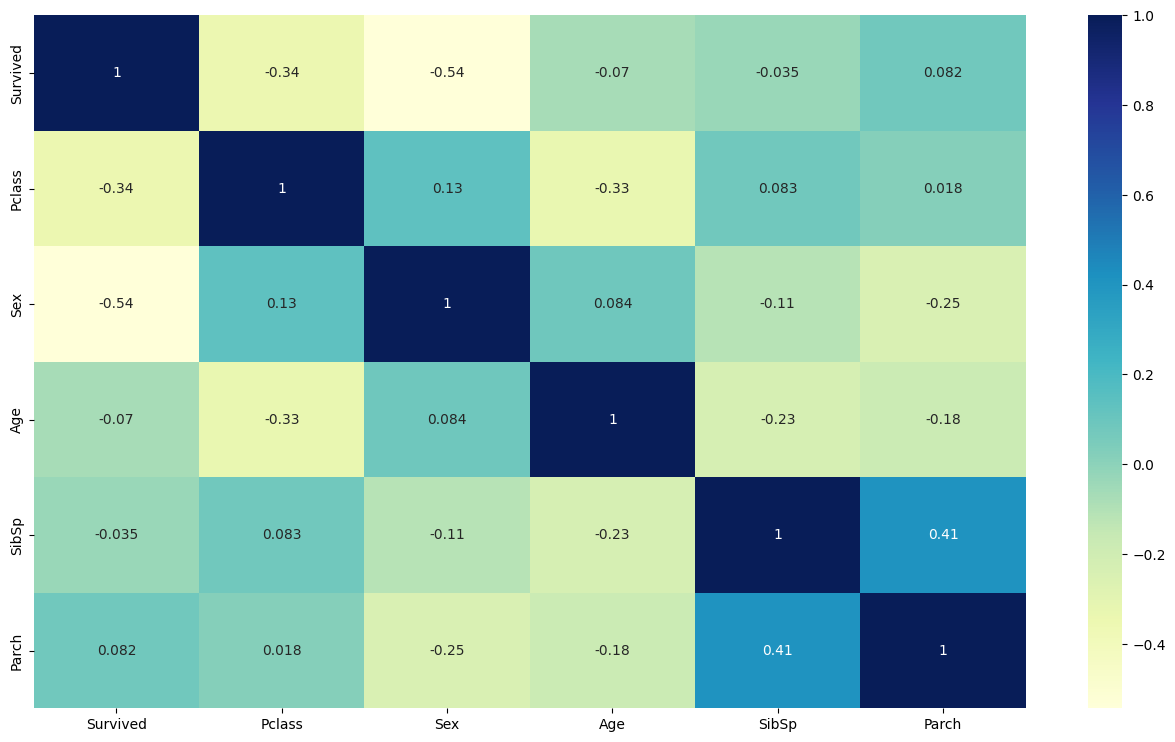

In [7]:
# Facciamo una correlazione visualizzandola con Seaborn 
correlazione = titanic.corr()

plt.figure(figsize = (16, 9))
sn.heatmap(correlazione, cmap = "YlGnBu", annot = True)

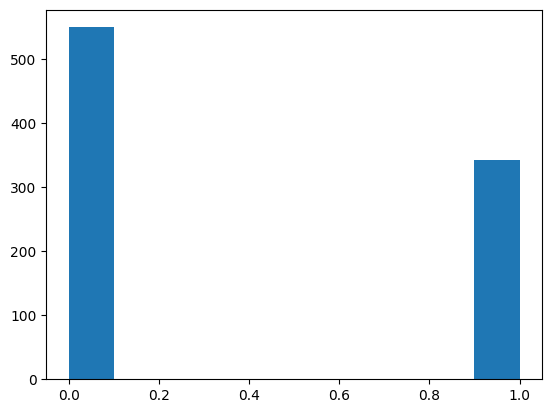

In [8]:
# Facciamo un istogramma per visualizzare quanti sopravvissuti (1.0)
plt.hist(titanic['Survived'])
plt.show()

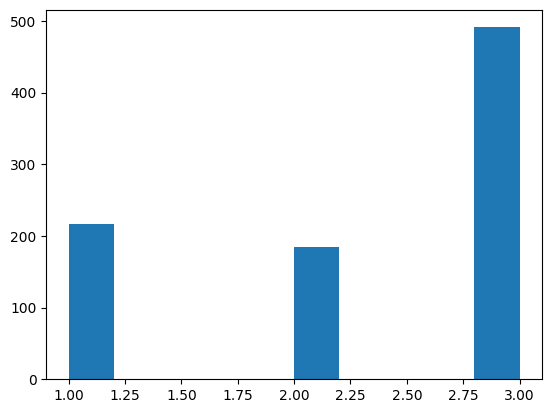

In [9]:
# Facciamo un istogramma per visualizzare la correlazione tra la mortalita e la cLasse di provenienza
plt.hist(titanic['Pclass'])
plt.show()

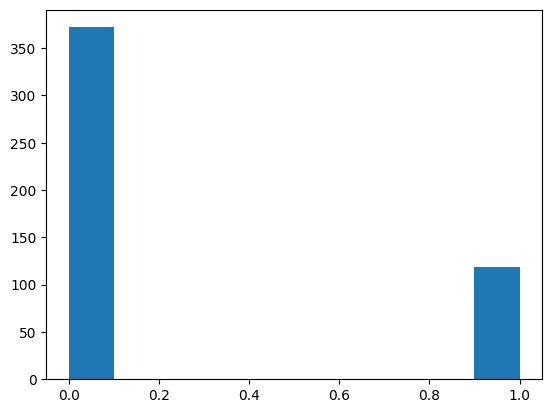

In [10]:
# Creiamo un filtro per le persone in terza classe
titanic3classe = titanic[titanic.Pclass == 3]
 
# Applichiamo il filtro alla colonna 'Survived'
plt.hist(titanic3classe['Survived'])
plt.show()

In [11]:
# Cerchiamo la media tra il sesso e correliamola alla sopravvivenza con una Pivot
# Legenda = 0 : Donne ; 1 :  Uomini

titanic.pivot_table(index = 'Sex', aggfunc = 'mean', values = 'Survived')
# Notiamo che le donne sono sopravissute al 74%

,Survived
Sex,
0,0.742038
1,0.188908


In [12]:
# Aggiungiamo anche la classe
titanic.pivot_table(index = 'Sex', columns = 'Pclass', aggfunc = 'mean', values = 'Survived')
# Notiamo che le donne in prima e secodna classe sono sopravissute circa al 94%
# Le donne della terza classe al 50%

Pclass,1,2,3
Sex,,,
0,0.968085,0.921053,0.500000
1,0.368852,0.157407,0.135447


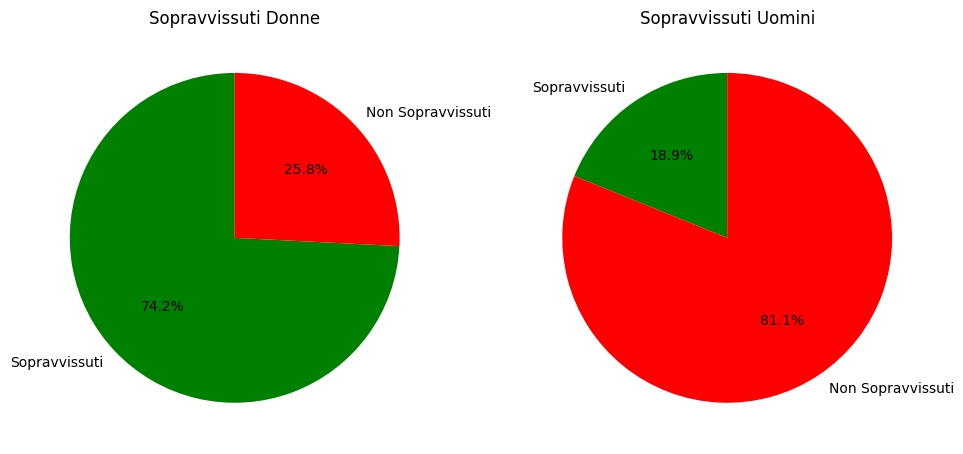

In [13]:
# Calcoliamo la percentuale di sopravvissuti per ogni sesso
percentuale = titanic.groupby('Sex')['Survived'].mean() * 100
# Etichette per il diagramma a torta
labels = ['Sopravvissuti', 'Non Sopravvissuti']
colors = ['g', 'r']

# Crea il diagramma a torta per donne e uomini 
donnesopravvisute = percentuale[0]
donnenonsopravvissute = 100 - donnesopravvisute
uominisopravvissuri = percentuale[1]
uomininonsopravvissuri = 100 - uominisopravvissuri

# Tracciamo il diagramma a torta,con 'figsize' impostiamo le dimensioni in pollici
# 'plt.subplots()'  è una funzione che crea una figura con uno o più sotto-grafici.
# 1 significa che c'è una sola riga di sotto-grafici e 2 significa che ci sono due colonne di sotto-grafici
#  Così stiamo creando una figura con 1 riga e 2 colonne.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

# Diagramma a torta per le donne e uomini, mettendo 'autopct' che ci restituiscve in figura la percentuale
ax1.pie([donnesopravvisute, donnenonsopravvissute], labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)
ax1.set_title('Sopravvissuti Donne')
# Con 'startangle = 90' impostiamo l'angolo di 90°
ax2.pie([uominisopravvissuri, uomininonsopravvissuri], labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90)
ax2.set_title('Sopravvissuti Uomini')

# Mostra il grafico
plt.tight_layout()
plt.show()


In [14]:
# Integriamo AI Classificazione

# Creiamo la x e la y
X = titanic[['Pclass','Sex','Age','SibSp','Parch']]
# la y è il target (cio che dobbiamo prevedere)
y = titanic['Survived']

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20 ) 
# Creazione del modello vuoto
logreg = LogisticRegression()
# Training del modello sui dati di train
logreg.fit(xtrain, ytrain)
# Predict sui dati di test (il modello non li ha mai visti)
ypredicted = logreg.predict(xtest)

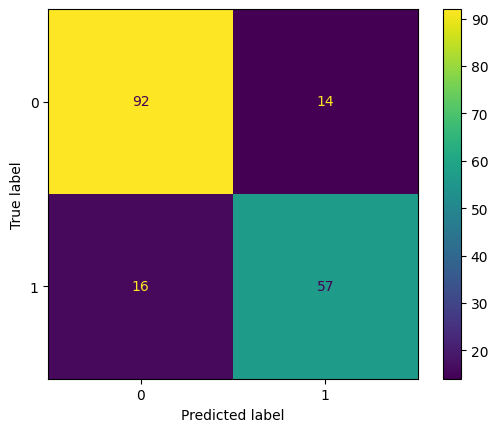

In [16]:
# Generiamo la matrice di confuzione
cm = confusion_matrix(ytest, ypredicted )
# Modalità per poterla mettere su schermo 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [17]:
# Adattiamo il modello su basi statistiche

# Mario Rossi, sta in terza classe, è uomo, ha 22 anni, no fratelli e no filgi
mariorossi = np.array([3,1,22,0,0])
previsione = logreg.predict(mariorossi.reshape(1,-1))[0]

if previsione == 0:
    print('Mario Rossi non sarebbe sopravvissuto al Titanic.')
    
# Luigi Rossi, sta in prima classe, è uomo, ha 22 anni, no fratelli e no filgi
luigirossi = np.array([1,1,22,0,0])
previsione = logreg.predict(luigirossi.reshape(1,-1))[0]

if previsione == 0:
    print('Luigi Rossi non sarebbe sopravvissuto al Titanic.')
else:
    print('Luigi Rossi sarebbe sopravvissuto al Titanic.')

Mario Rossi non sarebbe sopravvissuto al Titanic.
Luigi Rossi sarebbe sopravvissuto al Titanic.


C:\Users\franc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\franc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


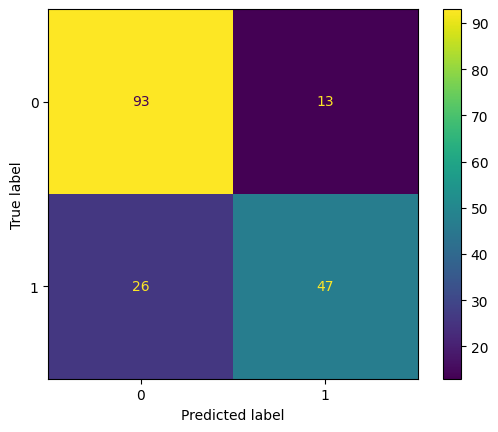

In [18]:
# Decision tree classifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(xtrain,ytrain)
# Predict the response for test dataset
ypred = clf.predict(xtest)

# Generiamo la matrice di confuzione
cm = confusion_matrix(ytest, ypred)
# Modalità per poterla mettere su schermo 
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

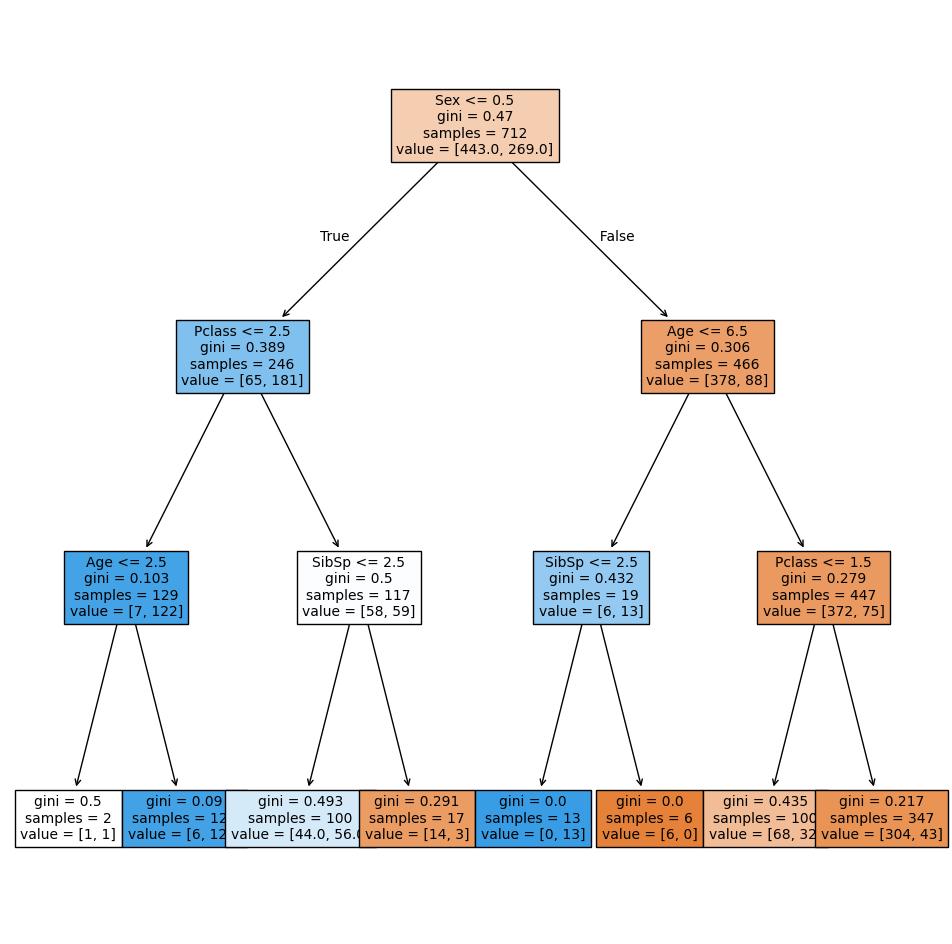

Gli alberi di decisione sono un algoritmo potente per problemi di classificazione e regressione
Sono facili da comprendere e da visualizzare
Importante far attenzione al sovradattamento e alla complessità dell'albero per evitare di compromettere le prestazioni sui nuovi dati.


In [19]:
# Crea un decision tree classifier
classifier = DecisionTreeClassifier(max_depth = 3)
# Addestra il regressor sul training set
classifier.fit(xtrain, ytrain)

from sklearn import tree
plt.figure(figsize = (12,12))  # set plot size (denoted in inches)
tree.plot_tree(classifier, 
               feature_names = xtrain.columns, 
               filled = True, fontsize = 10)

plt.show()
# "Semples" = campioni
# "Gini" = impurità della
# "Value" = divisione dei campioni in classi
# "Gini" = impurità della classe nel nodo (0 è puro)
print("Gli alberi di decisione sono un algoritmo potente per problemi di classificazione e regressione")
print("Sono facili da comprendere e da visualizzare")
print("Importante far attenzione al sovradattamento e alla complessità dell'albero per evitare di compromettere le prestazioni sui nuovi dati.")

In [20]:
# RANDOM FOREST CLASSIFIER (di default crea 100 alberi decisionali)

clf = RandomForestClassifier()
# Train Decision Tree Classifer
clf = clf.fit(xtrain,ytrain)

# Predict test dataset
ypred = clf.predict(xtest)

# Valuta le prestazioni del regressor sul test set
ypred = classifier.predict(xtest)
acc = accuracy_score(ytest, ypred)
print("accuratezza :", round(acc,3))

accuratezza : 0.81


In [21]:
# SVC (Support Vector Macchine)

classifier = SVC()
# Addestra il regressor sul training set
classifier.fit(xtrain, ytrain)

# Valuta le prestazioni del regressor sul test set
ypred = classifier.predict(xtest)
acc1 = accuracy_score(ytest, ypred)
print("accuratezza :",round(acc1,3))

accuratezza : 0.615


In [22]:
# KNN

# Crea un decision tree classifier
classifier = KNeighborsClassifier(n_neighbors=5)
# Addestra il regressor sul training set
classifier.fit(xtrain, ytrain)

# Valuta le prestazioni del regressor sul test set
ypred = classifier.predict(xtest)
acc2 = accuracy_score(ytest, ypred)
print("accuratezza :", round(acc2,3))

cm = confusion_matrix(ytest, ypred)

accuratezza : 0.788
